# Dataset Origin and Description

The dataset used in this analysis was collected through an online Google Form survey built around a Pose-Controlled Digital Pickleball Game. The survey aimed to assess participants’ perceptions, learning experiences, and engagement with the game in the STEAM educational value context.

Data were collected in **three main sessions**:

> SurveyP1.csv:

1. **Session 1 — XMUM Recruitment Drive (University Students):**  
   Conducted during the XMUM Recruitment Drive, a club & society promotional event under Ai Club in XMUM, where students were invited to try the digital Pickleball game and complete a Google Form right after playing. This phase mainly targeted university students who visited the booth
   (Initial 51 entries with 29 columns).

2. **Session 2 — dPickleball Event @ XMUM (University Students):**  
   Conducted during a related on-campus event (dPickleball Event) under AI Club in XMUM. (Additional 9 entries with 1 extra column, total 60 entries 30 columns -- **Finalized**). The same core survey items were used, with one additional demographic question in this phase asking:  
   *“Do you have experience with coding/programming?”*

> SurveyP2.csv:

3. **Session 3 — High School Campus Visit Workshop (Hight School Students):**  
   Conducted during a workshop for visiting high school students. The survey was slightly adapted for this younger audience (e.g. using **Form** instead of **School**), while keeping the main game-related and STEAM-related items consistent.

For this data analysis, the responses are organised into **two cleaned CSV files**:

- **`SurveyP1.csv`** — Combined dataset for **Session 1 & Session 2 (XMUM students)**  
  - Contains **60 valid responses** with **30 columns**.  
  - Demographic fields include `Age`, `Gender`, and `School`, plus prior experience with Pickleball, motion-based digital games, and coding/programming.  
  - Followed by a series of Likert-scale items capturing perceptions of the game in relation to **Science, Technology, Engineering, Arts, Mathematics**, and overall engagement.

- **`SurveyP2.csv`** — Dataset for **Session 3 (high school workshop)**  
  - Contains **19 valid responses** with **29 columns**.  
  - Uses `Form` instead of `School`, and does **not** include the `Do you have experience with coding/programming?` question.  
  - The core Likert-scale items are kept aligned with `SurveyP1.csv` to allow comparison of STEAM-related perceptions across age groups.

Both files are derived from the **same original Google Form structure**, with only minor adjustments in demographic questions across phases. These small differences are handled during data cleaning and preparation to maintain consistency for analysis, without changing the meaning of respondents’ answers.


# Analysis Goals

In this data analysis, we aim to:
- Evaluate how the digital Pickleball game supports **engagement** and **STEAM-related educational value**.  
- Compare patterns between different demographic factors such as **University Students** (SurveyP1) vs **High School Students** (SurveyP2), Gender Comparison, Prior Experience Comparison and so on where relevant, while keeping a consistent analysis structure across all phases.

# 1.0 Data Loading & Preparation

In this section, we load both survey datasets (`SurveyP1.csv` and `SurveyP2.csv`) and combine them for analysis.  

Most question items are consistent across all 3 sessions, so a simple row-wise concatenation is used after aligning column names (e.g., replacing “Form” with “School” for Session 3).  

Basic checks are performed to ensure dimensions, missing values, and column consistency before proceeding for further analysis.


## 1.1 Load Raw Data


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load both datasets
df1 = pd.read_csv("SurveyP1.csv")
df2 = pd.read_csv("SurveyP2.csv")

# Display basic info
print("P1 shape:", df1.shape)
print("P2 shape:", df2.shape)

P1 shape: (60, 30)
P2 shape: (19, 29)


- SurveyP1.csv --> 60 rows 30 columns
- SurveyP2.csv --> 19 rows 29 columns

In [ ]:
df1.head()

,Timestamp,Age,Gender,School,Have you played Pickleball before?,Experience with motion-based digital games (e.g. Nintendo Switch/Wii games),Do you have experience with coding/programming?,The game helped me understand how body movement and reaction time affect performance.,"I became more aware of physical concepts (e.g. balance, coordination) while playing.",The game encouraged me to experiment and observe how actions affect outcomes.,...,The creativity of the game design made it more engaging.,The sound and UI design improved immersion.,The overall presentation motivated me to continue playing.,I could see how scoring reflected mathematical calculations.,The timing and angles of ball movement related to mathematical concepts.,"I understood how geometry (angles, trajectories) affects outcomes.","I became more aware of quantitative aspects (speed, accuracy, score).",The game was enjoyable and motivated me to continue playing.,I learned something new or gained insights through the gameplay.,I believe this game could be useful in an educational or training setting.
0,2025/10/08 7:07:38 pm GMT+8,19,Male,School of Foundation Studies,No,No,NaN,4,3,3,...,3,4,4,3,3,3,3,4,4,4
1,2025/10/08 7:08:01 pm GMT+8,18,Male,School of Foundation Studies,No,No,NaN,4,3,4,...,3,4,4,5,4,5,4,4,5,5
2,2025/10/08 7:27:29 pm GMT+8,18,Female,School of Economics and Management,No,Yes,NaN,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,2025/10/08 7:27:55 pm GMT+8,18,Female,School of Economics and Management,No,No,NaN,4,4,5,...,5,5,5,5,5,5,5,5,5,5
4,2025/10/08 7:35:56 pm GMT+8,%8,Female,School of Electrical and Computer Engineering,No,Yes,NaN,5,4,3,...,4,4,4,3,4,4,4,4,4,4


In [ ]:
df2.head()

,Timestamp,Age,Gender,Form,Have you played Pickleball before?,Experience with motion-based digital games (e.g. Nintendo Switch/Wii games),The game helped me understand how body movement and reaction time affect performance.,"I became more aware of physical concepts (e.g. balance, coordination) while playing.",The game encouraged me to experiment and observe how actions affect outcomes.,I could connect the gameplay experience to real-world sports or science.,...,The creativity of the game design made it more engaging.,The sound and UI design improved immersion.,The overall presentation motivated me to continue playing.,I could see how scoring reflected mathematical calculations.,The timing and angles of ball movement related to mathematical concepts.,"I understood how geometry (angles, trajectories) affects outcomes.","I became more aware of quantitative aspects (speed, accuracy, score).",The game was enjoyable and motivated me to continue playing.,I learned something new or gained insights through the gameplay.,I believe this game could be useful in an educational or training setting.
0,2025/11/21 2:07:39 pm GMT+8,18,Male,Form 6,Yes,Yes,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,2025/11/21 2:12:47 pm GMT+8,18,Male,Form 6,Yes,Yes,3,3,3,4,...,2,3,3,2,2,2,3,3,3,3
2,2025/11/21 2:16:09 pm GMT+8,18,Male,Form 6,Yes,Yes,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,2025/11/21 2:20:41 pm GMT+8,18,Female,Form 6,No,Yes,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,2025/11/21 2:22:08 pm GMT+8,18,Male,Form 6,No,Yes,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


Since SurveyP2.csv uses "Form" for the education level of high school instead of "School" which is used in SurveyP1.csv, we can just rename the "Form" column from SurveyP2.csv to match the "School" column in SurveyP1.csv and use concat function to combine the both dataset for easier analysis and comparison.

In [ ]:
# Standardise column names (Phase 3 uses 'Form' instead of 'School')
df2 = df2.rename(columns={"Form": "School"})

# Concatenate (row bind)
df = pd.concat([df1, df2], ignore_index=True)

# Display basic info
print("Combined shape:", df.shape)

Combined shape: (79, 30)


In [ ]:
df.head()

,Timestamp,Age,Gender,School,Have you played Pickleball before?,Experience with motion-based digital games (e.g. Nintendo Switch/Wii games),Do you have experience with coding/programming?,The game helped me understand how body movement and reaction time affect performance.,"I became more aware of physical concepts (e.g. balance, coordination) while playing.",The game encouraged me to experiment and observe how actions affect outcomes.,...,The creativity of the game design made it more engaging.,The sound and UI design improved immersion.,The overall presentation motivated me to continue playing.,I could see how scoring reflected mathematical calculations.,The timing and angles of ball movement related to mathematical concepts.,"I understood how geometry (angles, trajectories) affects outcomes.","I became more aware of quantitative aspects (speed, accuracy, score).",The game was enjoyable and motivated me to continue playing.,I learned something new or gained insights through the gameplay.,I believe this game could be useful in an educational or training setting.
0,2025/10/08 7:07:38 pm GMT+8,19,Male,School of Foundation Studies,No,No,NaN,4,3,3,...,3,4,4,3,3,3,3,4,4,4
1,2025/10/08 7:08:01 pm GMT+8,18,Male,School of Foundation Studies,No,No,NaN,4,3,4,...,3,4,4,5,4,5,4,4,5,5
2,2025/10/08 7:27:29 pm GMT+8,18,Female,School of Economics and Management,No,Yes,NaN,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,2025/10/08 7:27:55 pm GMT+8,18,Female,School of Economics and Management,No,No,NaN,4,4,5,...,5,5,5,5,5,5,5,5,5,5
4,2025/10/08 7:35:56 pm GMT+8,%8,Female,School of Electrical and Computer Engineering,No,Yes,NaN,5,4,3,...,4,4,4,3,4,4,4,4,4,4


From df.head(), we can observe that the names of the columns are very long, which will cause a headache for us when trying to do analysis. Therefore, we should rename the columns for easier process later.

## 1.2 Column Renaming & Whitespace Normalization
Rename Columns

In [ ]:
# List out the name of all columns
df.columns.tolist()

['Timestamp',
 'Age  ',
 'Gender',
 'School',
 '  Have you played Pickleball before?  ',
 'Experience with motion-based digital games (e.g. Nintendo Switch/Wii games)',
 'Do you have experience with coding/programming?',
 'The game helped me understand how body movement and reaction time affect performance. ',
 'I became more aware of physical concepts (e.g. balance, coordination) while playing. ',
 'The game encouraged me to experiment and observe how actions affect outcomes. ',
 'I could connect the gameplay experience to real-world sports or science. ',
 'The human pose detection worked effectively to support gameplay. ',
 'The game technology (Unity + webcam) felt reliable and responsive. ',
 'The use of real-time tracking increased my interest in digital technologies. ',
 'I found the game easy to use without special hardware such as remote controller.',
 'The system design (paddle, ball, scoring) was logical and easy to understand. ',
 'The integration of components (pose detecti

#### Column Naming Reference

Below are the short variable names along with their definition I will use throughout this analysis:

- Timestamp : time responses were collect
- Age : age of respondents
- Gender : gender of respondents
- Pickleball Experience : Have you played Pickleball before?
- Motion Game Experience : Experience with motion-based digital games (e.g. Nintendo Switch/Wii games)'
- Programming Experience : 'Do you have experience with coding/programming?'
- S1 : The game helped me understand how body movement and reaction time affect performance.
- S2 : I became more aware of physical concepts (e.g. balance, coordination) while playing.
- S3 : The game encouraged me to experiment and observe how actions affect outcomes.
- S4 : I could connect the gameplay experience to real-world sports or science.
- T1 : The human pose detection worked effectively to support gameplay.
- T2 : The game technology (Unity + webcam) felt reliable and responsive.
- T3 : The use of real-time tracking increased my interest in digital technologies.
- T4 : I found the game easy to use without special hardware such as remote controller.
- E1 : The system design (paddle, ball, scoring) was logical and easy to understand.
- E2 : The integration of components (pose detection, Unity, scoring) worked smoothly.
- E3 : The game demonstrated how system parts can interact to achieve results.
- E4 : Playing the game made me curious about how such systems are engineered.
- A1 : The visuals and graphics were appealing and enhanced my experience.
- A2 : The creativity of the game design made it more engaging.
- A3 : The sound and UI design improved immersion.
- A4 : The overall presentation motivated me to continue playing.
- M1 : I could see how scoring reflected mathematical calculations.
- M2 : The timing and angles of ball movement related to mathematical concepts.
- M3 : I understood how geometry (angles, trajectories) affects outcomes.
- M4 : I became more aware of quantitative aspects (speed, accuracy, score).
- G1 : The game was enjoyable and motivated me to continue playing.
- G2 : I learned something new or gained insights through the gameplay.
- G3 : I believe this game could be useful in an educational or training setting.

In [ ]:
df = df.rename(columns={
    'Timestamp': 'Timestamp',
    'Age  ': 'Age',
    'Gender': 'Gender',
    'School': 'School',
    '  Have you played Pickleball before?  ': 'Pickleball Experience',
    'Experience with motion-based digital games (e.g. Nintendo Switch/Wii games)': 'Motion Game Experience',
    'Do you have experience with coding/programming?': 'Programming Experience',
    'The game helped me understand how body movement and reaction time affect performance. ': 'S1',
    'I became more aware of physical concepts (e.g. balance, coordination) while playing. ': 'S2',
    'The game encouraged me to experiment and observe how actions affect outcomes. ': 'S3',
    'I could connect the gameplay experience to real-world sports or science. ': 'S4',
    'The human pose detection worked effectively to support gameplay. ': 'T1',
    'The game technology (Unity + webcam) felt reliable and responsive. ': 'T2',
    'The use of real-time tracking increased my interest in digital technologies. ': 'T3',
    'I found the game easy to use without special hardware such as remote controller.': 'T4',
    'The system design (paddle, ball, scoring) was logical and easy to understand. ': 'E1',
    'The integration of components (pose detection, Unity, scoring) worked smoothly. ': 'E2',
    'The game demonstrated how system parts can interact to achieve results. ': 'E3',
    'Playing the game made me curious about how such systems are engineered. ': 'E4',
    'The visuals and graphics were appealing and enhanced my experience. ': 'A1',
    'The creativity of the game design made it more engaging. ': 'A2',
    'The sound and UI design improved immersion. ': 'A3',
    'The overall presentation motivated me to continue playing. ': 'A4',
    'I could see how scoring reflected mathematical calculations. ': 'M1',
    'The timing and angles of ball movement related to mathematical concepts. ': 'M2',
    'I understood how geometry (angles, trajectories) affects outcomes. ': 'M3',
    'I became more aware of quantitative aspects (speed, accuracy, score).': 'M4',
    'The game was enjoyable and motivated me to continue playing. ': 'G1',
    'I learned something new or gained insights through the gameplay. ': 'G2',
    'I believe this game could be useful in an educational or training setting. ': 'G3'
})

df.head()


,Timestamp,Age,Gender,School,Pickleball Experience,Motion Game Experience,Programming Experience,S1,S2,S3,...,A2,A3,A4,M1,M2,M3,M4,G1,G2,G3
0,2025/10/08 7:07:38 pm GMT+8,19,Male,School of Foundation Studies,No,No,NaN,4,3,3,...,3,4,4,3,3,3,3,4,4,4
1,2025/10/08 7:08:01 pm GMT+8,18,Male,School of Foundation Studies,No,No,NaN,4,3,4,...,3,4,4,5,4,5,4,4,5,5
2,2025/10/08 7:27:29 pm GMT+8,18,Female,School of Economics and Management,No,Yes,NaN,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,2025/10/08 7:27:55 pm GMT+8,18,Female,School of Economics and Management,No,No,NaN,4,4,5,...,5,5,5,5,5,5,5,5,5,5
4,2025/10/08 7:35:56 pm GMT+8,%8,Female,School of Electrical and Computer Engineering,No,Yes,NaN,5,4,3,...,4,4,4,3,4,4,4,4,4,4


Now the name of the columns looks perfect and clean, we can proceed to data cleaning

## 1.3 Data Cleaning: Duplicate Removal & Missing Value Scan


Remove duplicated entries if any

In [ ]:
df = df.drop_duplicates()

Check if there is any missing value

In [ ]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
School,0
Pickleball Experience,0
Motion Game Experience,0
Programming Experience,70
S1,0
S2,0
S3,0


## 1.4 Targeted Action on “Programming Experience”

As mention above, the question regarding "Programming Experience" was introduced later in phase 2 of data collection and removed in phase 3 of data collection, which explains why we have 70 missing values under that particular column. Since the number of data obtained for this question is only 9, which is small, we can safely drop this column as it doest bring any significant value to the analysis.

In [ ]:
# Drop the column with excessive missing values
df = df.drop(columns=['Programming Experience'])

# Verify removal
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Timestamp               79 non-null     object
 1   Age                     79 non-null     object
 2   Gender                  79 non-null     object
 3   School                  79 non-null     object
 4   Pickleball Experience   79 non-null     object
 5   Motion Game Experience  79 non-null     object
 6   S1                      79 non-null     int64 
 7   S2                      79 non-null     int64 
 8   S3                      79 non-null     int64 
 9   S4                      79 non-null     int64 
 10  T1                      79 non-null     int64 
 11  T2                      79 non-null     int64 
 12  T3                      79 non-null     int64 
 13  T4                      79 non-null     int64 
 14  E1                      79 non-null     int64 
 15  E2      

After removing the entire "Programming Experience" column, we are left with 79 rows and 29 columns

## 1.5 Data Type Fixes

As we can observe from the preview of the dataset, there is a notable misidentfication in the column 'Age' that might be a potential error. Therefore, we should perform a deeper exploration in this particular column by looking at the unique values in 'Age'.

In [ ]:
df['Age'].unique()

array(['19', '18', '%8', '17', '21', '23', '20', '22', '25', '24', 18],
      dtype=object)

From the unique value of the column "Age", we can observe that there is an innapropriate value ('%8'). Due to this value, the column "Age" is also mistakenly identified as object type instead of int.

Logically, since this survey was conducted in a university setting, we are going to make an educated guess by assuming this is ('18') instead. So, we will convert this value and later convert the data type of "Age".

In [ ]:
df['Age'] = df["Age"].replace('%8','18')
df['Age'].unique()

array(['19', '18', '17', '21', '23', '20', '22', '25', '24', 18],
      dtype=object)

from the data info, we can observe that only two data types require conversion, which are "Timestamp" and "Age".

In [ ]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype                    
---  ------                  --------------  -----                    
 0   Timestamp               79 non-null     datetime64[ns, UTC-08:00]
 1   Age                     79 non-null     int64                    
 2   Gender                  79 non-null     object                   
 3   School                  79 non-null     object                   
 4   Pickleball Experience   79 non-null     object                   
 5   Motion Game Experience  79 non-null     object                   
 6   S1                      79 non-null     int64                    
 7   S2                      79 non-null     int64                    
 8   S3                      79 non-null     int64                    
 9   S4                      79 non-null     int64                    
 10  T1                      79 non-null     

/tmp/ipython-input-332071150.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')


In [ ]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
School,0
Pickleball Experience,0
Motion Game Experience,0
S1,0
S2,0
S3,0
S4,0


Now we have ensured that there is no more missing values and incorrect data types or duplicated entries. Therefore, we are safe to proceed for further process

## 1.6 Column Mapping

Another interesting column that deserve to be explored deeper would be 'School' as it contains an open ended "answer/others:__" option for the respondent to fill in the survey.

In [ ]:
df["School"].unique()

array(['School of Foundation Studies',
       'School of Economics and Management',
       'School of Electrical and Computer Engineering',
       'School of Traditional Chinese Medicine',
       'Bachelor of Artificial Intelligence and Engneering', 'Ai',
       'School of Energy and Chemical Engineering',
       'Artificial Intelligence', 'FIA',
       'School of Computing and Data Science',
       'School of Mathematics and Physics', 'Form 6'], dtype=object)

As we can observe, some respondents typed program names or abbreviations instead of the official school names.

Now, let's clean and standardize the responses in the School column to match XMUM’s official schools, which can be found on https://www.xmu.edu.my/14676/list.htm.


In [ ]:
# mapping dictionary
school_fix = {
    'Bachelor of Artificial Intelligence and Engneering': 'School of Electrical and Computer Engineering',
    'Ai': 'School of Electrical and Computer Engineering',
    'Artificial Intelligence': 'School of Electrical and Computer Engineering',
    'School of Computing and Data Science': 'School of Electrical and Computer Engineering',
    'FIA': 'School of Foundation Studies'
}

# apply mapping
df['School'] = df['School'].replace(school_fix)
df['School'].unique()

array(['School of Foundation Studies',
       'School of Economics and Management',
       'School of Electrical and Computer Engineering',
       'School of Traditional Chinese Medicine',
       'School of Energy and Chemical Engineering',
       'School of Mathematics and Physics', 'Form 6'], dtype=object)

## 1.7 Data Overview
Now that we have done the necessary data cleaning steps, let us briefly review the information and description of the data to gain some quick insights and to ensure the data is well prepared for further analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype                    
---  ------                  --------------  -----                    
 0   Timestamp               79 non-null     datetime64[ns, UTC-08:00]
 1   Age                     79 non-null     int64                    
 2   Gender                  79 non-null     object                   
 3   School                  79 non-null     object                   
 4   Pickleball Experience   79 non-null     object                   
 5   Motion Game Experience  79 non-null     object                   
 6   S1                      79 non-null     int64                    
 7   S2                      79 non-null     int64                    
 8   S3                      79 non-null     int64                    
 9   S4                      79 non-null     int64                    
 10  T1                      79 non-null     

In [ ]:
df.describe()

,Age,S1,S2,S3,S4,T1,T2,T3,T4,E1,...,A2,A3,A4,M1,M2,M3,M4,G1,G2,G3
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,18.974684,4.075949,4.025316,4.101266,4.050633,3.949367,4.025316,4.139241,4.101266,4.265823,...,4.000000,4.000000,4.164557,4.037975,4.189873,4.088608,4.253165,4.151899,4.240506,4.316456
std,1.839556,0.888273,0.800235,0.941833,0.918454,0.998701,0.861940,0.812312,0.941833,0.811912,...,0.891556,0.877058,0.791467,0.868878,0.785705,0.879829,0.775727,0.907075,0.787974,0.793310
min,17.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,18.000000,4.000000,3.500000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,...,3.000000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,18.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
75%,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### - Observations:

From `df.describe()`:

1. Respondents’ ages range from **17 to 25 years old** (median ≈ 18), so the sample mainly consists of late-teen / young adult players from both university and high school.
2. All STEAM items (S1–M4) and General Engagement items (G1–G3) have mean scores around **3.9–4.4 out of 5**, indicating generally positive perceptions of the game in terms of learning and engagement.
3. Standard deviations are mostly around **0.8–1.0**, meaning responses are fairly consistent with no extreme spread, which is suitable for further statistical analysis.


## 1.8 Export Cleaned Data

Here we drop non-essential columns (such as the raw timestamp) and save a cleaned version of the dataset as `df_clean` for use in the later analysis.


In [ ]:
# Create cleaned dataframe
df_clean = df.drop(columns='Timestamp')

print("Original shape:", df.shape)
print("After dropping extra columns:", df_clean.shape)

# Export the cleaned dataframe to CSV
output_filename = "Pickleball_Survey_clean.csv"
df_clean.to_csv(output_filename, index=False)
print(f"Cleaned data exported to: {output_filename}")


Original shape: (79, 29)
After dropping extra columns: (79, 28)
Cleaned data exported to: Pickleball_Survey_clean.csv


Now in our cleaned dataset, we have 79 rows and 28 columns left

# 2.0 Domain Analysis


## 2.1 Domain Grouping
Each STEAM domain and the general engagement section has its own set of Likert-scale items.

We'll assign the short codes (S1–S4, etc.) into their respective domain lists to prepare for domain-level averaging later.

In [ ]:
science_cols = ['S1', 'S2', 'S3', 'S4']
technology_cols = ['T1', 'T2', 'T3', 'T4']
engineering_cols = ['E1', 'E2', 'E3', 'E4']
arts_cols = ['A1', 'A2', 'A3', 'A4']
math_cols = ['M1', 'M2', 'M3', 'M4']
general_cols = ['G1', 'G2', 'G3']

domain_sets = {
    'Science': science_cols,
    'Technology': technology_cols,
    'Engineering': engineering_cols,
    'Arts': arts_cols,
    'Mathematics': math_cols,
    'General': general_cols
}

for domain, cols in domain_sets.items():
    print(f"{domain}: {cols}")


Science: ['S1', 'S2', 'S3', 'S4']
Technology: ['T1', 'T2', 'T3', 'T4']
Engineering: ['E1', 'E2', 'E3', 'E4']
Arts: ['A1', 'A2', 'A3', 'A4']
Mathematics: ['M1', 'M2', 'M3', 'M4']
General: ['G1', 'G2', 'G3']


## 2.1.1 Reliability Analysis
Each STEAM domain (Science, Technology, Engineering, Arts, Mathematics) and the General-Engagement section is built from multiple Likert-scale items.
Before we use these domains for any averages or group comparisons, we check how consistently the items within each domain measure the same concept using Cronbach’s α.

α ≥ 0.70 → acceptable | α ≥ 0.80 → good | α ≥ 0.90 → excellent.

In [ ]:
def cronbach_alpha(df_subset):
    k = df_subset.shape[1]
    variances = df_subset.var(ddof=1)
    total_var = df_subset.sum(axis=1).var(ddof=1)
    return (k/(k-1)) * (1 - variances.sum()/total_var)

alphas = []
for name, cols in domain_sets.items():
    α = round(cronbach_alpha(df[cols]), 3)
    alphas.append({'Domain': name, 'k_items': len(cols), 'Cronbach_alpha': α})

alpha_table = pd.DataFrame(alphas)
alpha_table

,Domain,k_items,Cronbach_alpha
0,Science,4,0.859
1,Technology,4,0.859
2,Engineering,4,0.879
3,Arts,4,0.899
4,Mathematics,4,0.915
5,General,3,0.906


All six domains demonstrate excellent internal consistency, with Cronbach’s α ranging from 0.85 to 0.92.

According to conventional reliability thresholds (α ≥ 0.70 acceptable, α ≥ 0.80 good, α ≥ 0.90 excellent), every domain meets or exceeds the “good” level, confirming that the Likert items within each domain measure their intended construct consistently.

Therefore, it is valid to compute and analyze the averaged domain scores for each participant in subsequent steps.

## 2.1.2 Domain Score Construction
Since each domain’s reliability has been confirmed, we can now calculate the average score for each respondent in every STEAM domain and the General Engagement domain.
This step converts multiple item-level responses into a single representative value per domain, making comparison and visualization much clearer.

In [ ]:
# Compute average score for each domain
df['Science'] = df[science_cols].mean(axis=1)
df['Technology'] = df[technology_cols].mean(axis=1)
df['Engineering'] = df[engineering_cols].mean(axis=1)
df['Arts'] = df[arts_cols].mean(axis=1)
df['Mathematics'] = df[math_cols].mean(axis=1)
df['General'] = df[general_cols].mean(axis=1)

# Quick check to confirm new columns are created
df[['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']].head()

,Science,Technology,Engineering,Arts,Mathematics,General
0,3.25,3.75,3.50,3.50,3.00,4.000000
1,3.75,4.50,5.00,3.50,4.50,4.666667
2,4.75,4.25,5.00,5.00,5.00,5.000000
3,4.50,5.00,4.75,5.00,5.00,5.000000
4,3.75,3.25,4.25,3.75,3.75,4.000000


Each participant now has six computed mean scores, one for each of the five STEAM domains and one for General Engagement.
These composite scores will form the basis for all upcoming analyses, including descriptive summaries, visual comparisons, and inferential tests.

## 2.1.3 Descriptive Statistics & Visualization
In this section, we summarize the overall response patterns across all six domains (Science, Technology, Engineering, Arts, Mathematics, and General Engagement).
By computing measures such as the mean, standard deviation, and 95% confidence interval (CI), we can identify which areas participants rated highest and lowest.
Visualizing these averages provides an intuitive overview of how the digital pickleball game supports different aspects of STEAM learning and user engagement.

In [ ]:
import matplotlib.pyplot as plt

# Select the six domain columns
domains = ['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']

# --- Compute descriptive statistics ---
def domain_stats(series):
    n = series.count()
    mean = series.mean()
    sd = series.std(ddof=1)
    se = sd / np.sqrt(n)
    ci95 = 1.96 * se
    return pd.Series({'N': n, 'Mean': mean, 'SD': sd, 'CI95_Lower': mean - ci95, 'CI95_Upper': mean + ci95})

desc_table = df[domains].apply(domain_stats).T.round(3)
desc_table


,N,Mean,SD,CI95_Lower,CI95_Upper
Science,79.0,4.063,0.745,3.899,4.228
Technology,79.0,4.054,0.760,3.886,4.221
Engineering,79.0,4.123,0.728,3.963,4.284
Arts,79.0,4.019,0.764,3.851,4.187
Mathematics,79.0,4.142,0.740,3.979,4.306
General,79.0,4.236,0.763,4.068,4.404


The descriptive table presents each domain’s mean, standard deviation (SD), and 95% confidence interval (CI).

- **Mean (M):** the average agreement level for each domain.  
- **Standard Deviation (SD):** how varied the responses are.  
- **Confidence Interval (CI):** the likely range of the true population mean.

### Interpretation:

> **Science (M = 4.06, SD = 0.75, CI [3.90, 4.23])**  
- Responses show consistent agreement that the game encouraged scientific thinking such as observing and testing.

> **Technology (M = 4.05, SD = 0.76, CI [3.89, 4.22])**  
- Slightly wider spread but still leaning positive, indicating the technology aspect (motion tracking, controls) was generally well-received.

> **Engineering (M = 4.12, SD = 0.73, CI [3.96, 4.28])**  
- Consistent responses suggest players felt the game supported problem-solving and system-based reasoning.

> **Arts (M = 4.02, SD = 0.76, CI [3.85, 4.19])**  
- More variation compared to other domains; perceptions of aesthetics and creativity differ among participants.

> **Mathematics (M = 4.14, SD = 0.74, CI [3.98, 4.31])**  
- Stable ratings indicate agreement that the game encouraged logical thinking and spatial reasoning.

> **General Engagement (M = 4.24, SD = 0.76, CI [4.07, 4.40])**  
- Highest overall mean; respondents were consistently engaged and enjoyed the gameplay experience.

### Summary:

Across all domains, mean scores are **around 4.0–4.2**, showing strong positive perceptions of the game.  
Standard deviations remain moderate (~0.7), suggesting reasonably consistent responses across participants.  
The narrow CIs indicate reliable and stable estimates, reinforcing that participants had uniformly positive views of the game across STEAM and engagement dimensions.


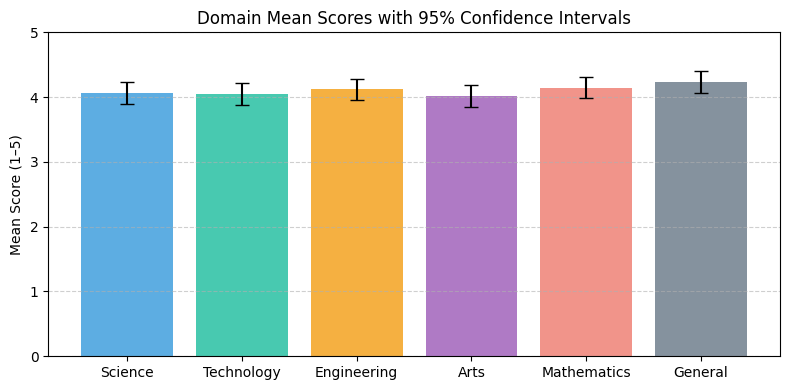

In [ ]:
# --- Visualization: Mean Scores with 95% CI ---
means = desc_table['Mean'].values
errors = [means - desc_table['CI95_Lower'], desc_table['CI95_Upper'] - means]

plt.figure(figsize=(8, 4))
plt.bar(domains, means, yerr=errors, capsize=5, color=['#5DADE2', '#48C9B0', '#F5B041', '#AF7AC5', '#F1948A', '#85929E'])
plt.ylim(0, 5)
plt.ylabel('Mean Score (1–5)')
plt.title('Domain Mean Scores with 95% Confidence Intervals')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The bar plot visually summarizes the mean scores for each domain, with the black error bars showing the 95% confidence intervals.

What they show:

- Shorter error bars → responses were more consistent across participants.  
- Slightly longer error bars → more variation in opinions.

### Observations:

- All domains score above **4.0**, reflecting strong overall positive perceptions of the game’s STEAM and engagement value.
- **Mathematics**, **Engineering**, and **General Engagement** have slightly higher means and tight error bars, indicating stable and consistently positive feedback from participants.
- **Arts** and **Technology** show marginally wider intervals, suggesting slightly more diverse opinions—likely due to differences in aesthetic preferences and familiarity with motion-based technology.

### Summary:

Together, the table and plot show:

- Strong and consistent approval across all STEAM domains and General Engagement.
- Highest consistency (smallest CI ranges) in **Mathematics**, **Engineering**, and **General Engagement**, which aligns with the game’s emphasis on logic, movement feedback, and interaction.
- Slightly wider variability in **Technology** and **Arts**, pointing to areas where user experience could be refined, particularly in intuitiveness and visual engagement.

# 3.0 School Group Analysis

## 3.1 School Grouping

To simplify comparison across different academic backgrounds, we will restructure the original `School` entries into four broader categories that reflect their study level and discipline:

- **Technical** – engineering, computing, physics, and other science-based programs.  
- **Non-Technical** – business, economics, Chinese medicine, arts, and social science programs.  
- **Foundation** – XMUM pre-university foundation studies.  
- **High School** – participants from Form 6 / pre-university sections outside XMUM.

This grouping separates Form 6 from Foundation while keeping distinctions between technical and non-technical fields clear for later statistical comparisons.


In [ ]:
school_counts = df['School'].value_counts().reset_index()
school_counts.columns = ['School', 'Count']
school_counts

,School,Count
0,School of Electrical and Computer Engineering,29
1,Form 6,19
2,School of Economics and Management,13
3,School of Foundation Studies,10
4,School of Traditional Chinese Medicine,4
5,School of Energy and Chemical Engineering,3
6,School of Mathematics and Physics,1


Now, we will group the following schools into their respective group.

In [ ]:
def map_school_group(school):
    school = school.strip().lower()

    if school in [
        'school of electrical and computer engineering',
        'school of energy and chemical engineering',
        'school of mathematics and physics'
    ]:
        return 'Technical'

    elif school in [
        'school of economics and management',
        'school of traditional chinese medicine'
    ]:
        return 'Non-Technical'

    elif school in [
        'school of foundation studies'
    ]:
        return 'Foundation'

    else:
        return 'High School'

# Apply mapping
df['School_Group'] = df['School'].apply(map_school_group)

# Check the merged counts
group_counts = df['School_Group'].value_counts().reset_index()
group_counts.columns = ['School_Group', 'Count']
group_counts


,School_Group,Count
0,Technical,33
1,High School,19
2,Non-Technical,17
3,Foundation,10


Based on the classification, we obtained four meaningful academic background groups:

- **Technical (n = 33)** – represents engineering and science-oriented schools students.  
- **Non-Technical (n = 17)** – business and health-related disciplines.
- **Foundation (n = 10)** – Pre-university foundation students from XMUM.  
- **High School (n = 19)** – highschool students from outside XMUM.

All groups exceed the minimum recommended size for comparative analysis (≈10 participants per category), making them suitable for later statistical tests such as **ANOVA** or **Kruskal–Wallis**.  

This grouping provides conceptual clarity and allows us to examine whether students from different educational pathways perceive the game’s STEAM value differently.


### 3.1.1 Visualization

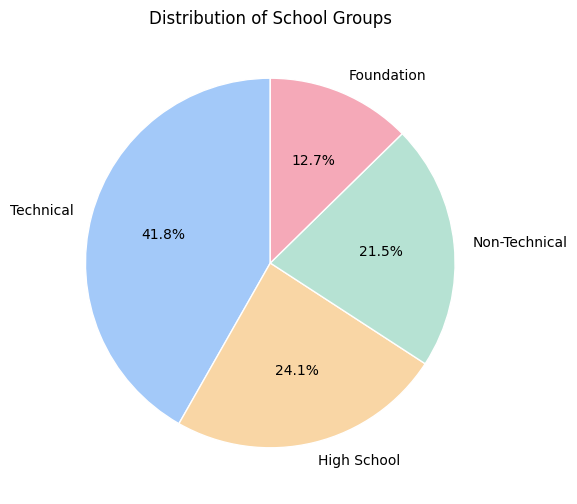

In [ ]:
import matplotlib.pyplot as plt

# Soft pastel color palette
colors = ['#A3C9F9',  # soft blue
          '#F9D6A5',  # pastel peach
          '#B6E2D3',  # mint green
          '#F5A9B8']  # soft pink

plt.figure(figsize=(6,6))
df['School_Group'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Distribution of School Groups')
plt.ylabel('')
plt.show()


From the pie chart, we can observe that most of the respondents are from Technical School (41.8%), followed by High School (24.1%), Non-Technical School (21.5%) and finally Foundation (12.7%).

## 3.2 Descriptive Statistics & Visualisation

This section compares the mean domain scores across the four School Groups:

- Technical (n=33)
- Non-Technical (n=17)
- Foundation (n=10)
- High School (n=19)

The goal is to identify any visible patterns before running any formal statistical tests for further analysis.

We will compute descriptive statistics (N, Mean, SD) for each group within every domain and visualize the results to reveal initial trends.

In [ ]:
# List of target domains
domains = ['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']

# Compute descriptive stats by School_Group
school_group_stats = (
    df.groupby('School_Group')[domains]
    .agg(['count', 'mean', 'std'])
    .round(3)
)

school_group_stats

Science               Technology               Engineering  \
                count   mean    std      count   mean    std       count   
School_Group                                                               
Foundation         10  4.000  0.898         10  4.025  0.837          10   
High School        19  3.645  0.653         19  3.737  0.733          19   
Non-Technical      17  4.015  0.817         17  4.044  0.772          17   
Technical          33  4.348  0.603         33  4.250  0.715          33   

                             Arts               Mathematics                \
                mean    std count   mean    std       count   mean    std   
School_Group                                                                
Foundation     3.900  0.851    10  3.625  0.945          10  3.975  0.996   
High School    3.711  0.765    19  3.566  0.676          19  3.711  0.760   
Non-Technical  4.235  0.676    17  4.235  0.682          17  4.397  0.587   
Technical      4.371  0.587    33  4.288  0.641          33  4.311  0.612   

              General                
                count   mean    std  
School_Group                         
Foundation         10  4.033  1.082  
High School        19  3.702  0.666  
Non-Technical      17  4.431  0.685  
Technical          33  4.505  0.572

From the table, we observe clear differences across the four groups:

- **Technical students** scored the highest across almost all domains, especially in Science, Technology, and Engineering. This aligns with their stronger academic exposure to technical concepts.
- **Non-Technical students** also rated the game positively (means ≈ 4.0–4.4), showing that the gameplay remains intuitive and engaging even without a technical background.
- **Foundation students** showed moderate but still positive ratings (≈ 3.6–4.0), which is expected as they are early-stage learners with less specialised exposure.
- **High School (Form 6)** students consistently gave the lowest scores (≈ 3.6–3.7), likely due to being younger and less familiar with university-level academic concepts or motion-based game systems.

Overall, SD values within each group remain small, indicating consistent responses in each category.


### 3.2.1 Barplot

/tmp/ipython-input-1624020868.py:9: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=df_melt, x='Domain', y='Score', hue='School_Group',


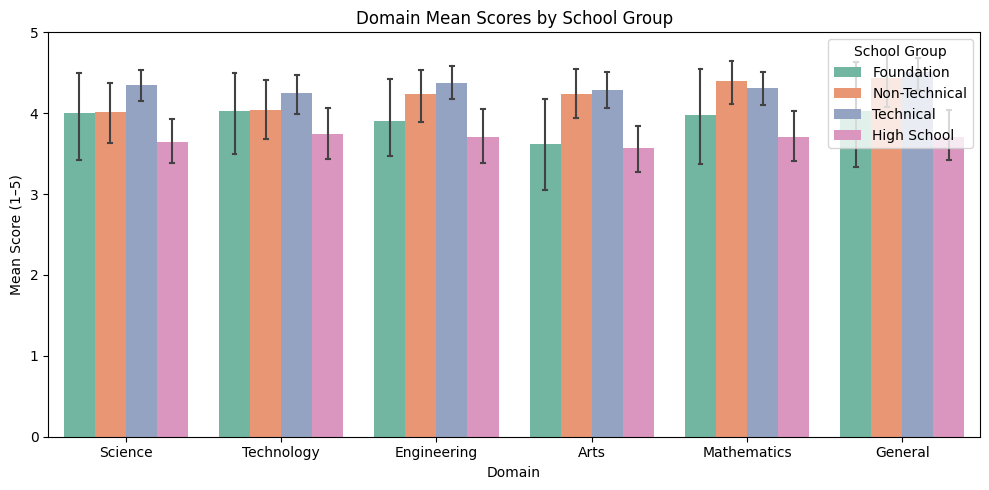

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt data for seaborn plotting
df_melt = df.melt(id_vars='School_Group', value_vars=domains,
                  var_name='Domain', value_name='Score')

plt.figure(figsize=(10,5))
sns.barplot(data=df_melt, x='Domain', y='Score', hue='School_Group',
            palette='Set2', capsize=0.1, errwidth=1.5)
plt.ylim(0,5)
plt.ylabel('Mean Score (1–5)')
plt.title('Domain Mean Scores by School Group')
plt.legend(title='School Group', loc='upper right')
plt.tight_layout()
plt.show()


The plot reinforces the patterns seen in the table:

- **Technical students** consistently show the highest mean scores across all domains, with very small error bars. This indicates strong and stable positive perceptions of the game’s Science, Technology, Engineering, and Mathematics aspects.
- **Non-Technical students** follow closely behind, showing solid agreement in all domains, especially in Arts and Mathematics.
- **Foundation students** display moderate scores (~3.6–4.0), reflecting beginner-level familiarity with STEAM concepts.
- **High School (Form 6)** students scored the lowest across all domains (~3.6–3.7), but still within the “agree” range, showing that the game remains accessible to younger players.

Shorter error bars for Technical and Non-Technical groups indicate more consistent responses within these groups.


### 3.2.2 Boxplot

To better understand the distribution of scores within each school group, the following boxplots visualize the median, variability, and spread of responses for each STEAM domain. This helps reveal whether differences arise from central tendency (median) or from variability within groups.


/tmp/ipython-input-4044872137.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='School_Group', y=d, palette='Pastel1')


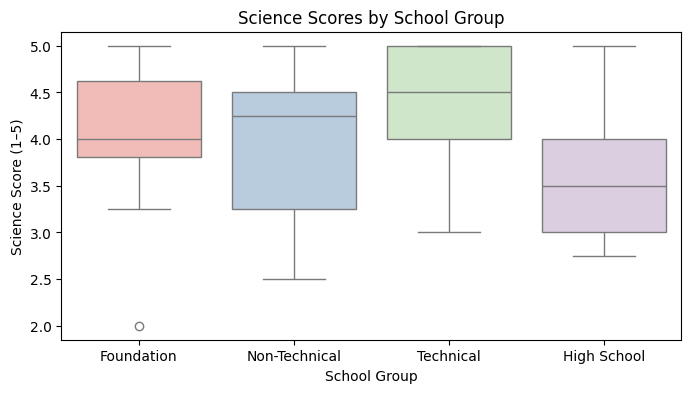

/tmp/ipython-input-4044872137.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='School_Group', y=d, palette='Pastel1')


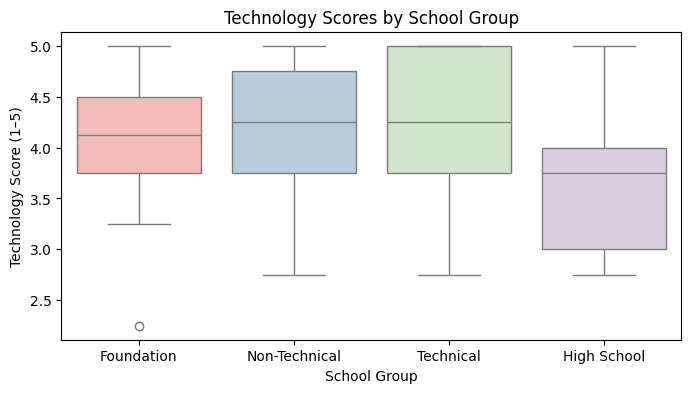

/tmp/ipython-input-4044872137.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='School_Group', y=d, palette='Pastel1')


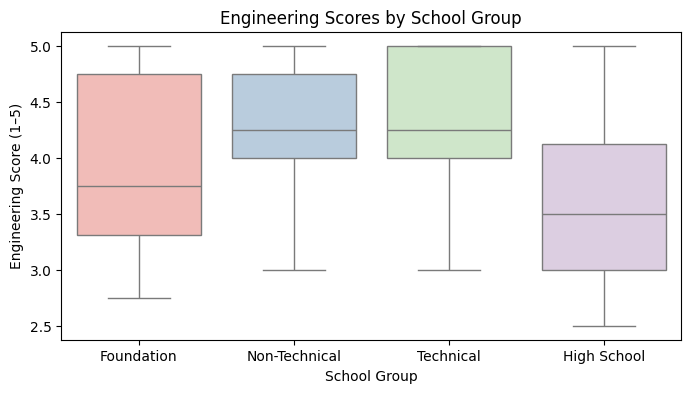

/tmp/ipython-input-4044872137.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='School_Group', y=d, palette='Pastel1')


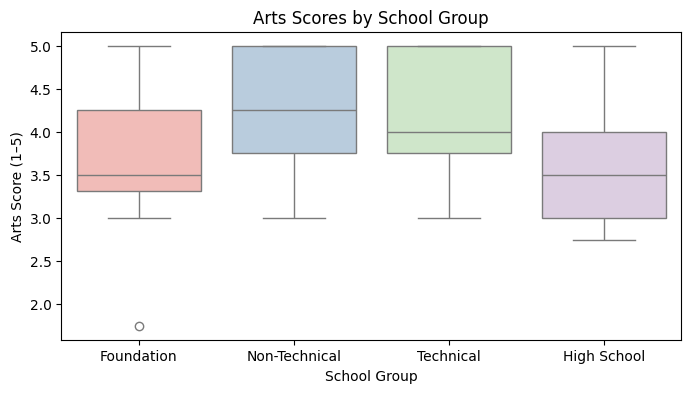

/tmp/ipython-input-4044872137.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='School_Group', y=d, palette='Pastel1')


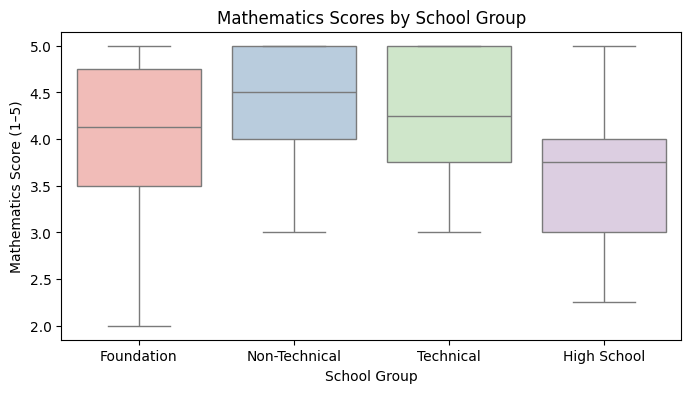

/tmp/ipython-input-4044872137.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='School_Group', y=d, palette='Pastel1')


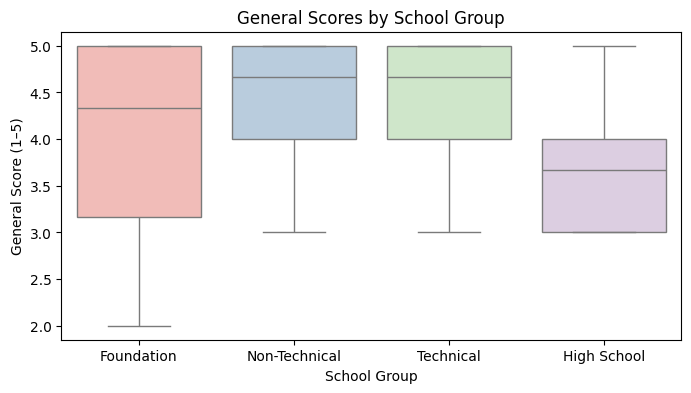

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

domains = ['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']

for d in domains:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='School_Group', y=d, palette='Pastel1')
    plt.title(f'{d} Scores by School Group')
    plt.xlabel('School Group')
    plt.ylabel(f'{d} Score (1–5)')
    plt.show()

Across all six domains, the boxplots reveal a consistent trend in how different School Groups perceive the game:

- **High School students show the lowest median scores across every domain**. Their distributions are shifted downward with narrower IQRs, indicating lower overall ratings and less variation among High School respondents.

- **Technical and Non-Technical students display higher and closely aligned medians**, with overlapping IQRs in most domains. This suggests both groups generally share similar levels of agreement and overall perception toward the game’s STEAM-related elements.

- **Foundation students show wider variability**, with some noticeably low outliers (e.g., scores of 2 in Science, Arts, and General). Although their medians are not drastically different from Non-Technical students, the increased spread indicates a more mixed range of perceptions.

- **Technical students tend to have the highest median or near-highest median scores** across multiple domains, particularly in Science, Engineering, and General Engagement, reflecting strong positive evaluations.

- **Technology appears more uniformly rated**, but High School still has the lowest median among the groups, though the gap is smaller compared to other domains.

Overall, these boxplots visually highlight the general pattern that **High School students consistently rate the game lower**, while **Technical and Non-Technical students show stronger and more consistent agreement**. Foundation students remain more variable but broadly positive. These visual patterns set the stage for subsequent statistical testing.


## 3.3 Assumption Testing (Normality & Homogeneity)

Before diging deep down into comparing domain scores across the three School Groups, we test two key assumptions:

> Normality — whether the domain scores within each School Group follow a roughly normal distribution.
- If normal → ANOVA is allowed
- If not normal → Kruskal–Wallis is safer

> Homogeneity of Variance — whether the spread (variance) of scores is similar across groups.
- If variances equal → ANOVA
- If variances unequal → Welch ANOVA or Kruskal–Wallis

We will use:
- Shapiro–Wilk for normality (good for small–medium samples)
- Levene’s Test for homogeneity

These tests will be performed per domain.

In [ ]:
from scipy.stats import shapiro, levene

domains = ['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']

assumption_results = []

for d in domains:
    # Split by the four groups
    g1 = df[df['School_Group'] == 'Technical'][d]
    g2 = df[df['School_Group'] == 'Non-Technical'][d]
    g3 = df[df['School_Group'] == 'Foundation'][d]
    g4 = df[df['School_Group'] == 'High School'][d]

    # Normality tests
    sw1 = shapiro(g1)[1]
    sw2 = shapiro(g2)[1]
    sw3 = shapiro(g3)[1]
    sw4 = shapiro(g4)[1]

    # Homogeneity of variance
    lev = levene(g1, g2, g3, g4)[1]

    assumption_results.append({
        'Domain': d,
        'SW_p_Tech': round(sw1, 4),
        'SW_p_NonTech': round(sw2, 4),
        'SW_p_Found': round(sw3, 4),
        'SW_p_HS': round(sw4, 4),
        'Levene_p': round(lev, 4)
    })

assumption_df = pd.DataFrame(assumption_results)
assumption_df


,Domain,SW_p_Tech,SW_p_NonTech,SW_p_Found,SW_p_HS,Levene_p
0,Science,0.0032,0.0528,0.1749,0.0689,0.6990
1,Technology,0.0016,0.0658,0.4081,0.0438,0.9969
2,Engineering,0.0007,0.0088,0.1556,0.0621,0.4187
3,Arts,0.0010,0.0440,0.3039,0.0373,0.9321
4,Mathematics,0.0008,0.0402,0.2035,0.0907,0.1041
5,General,0.0000,0.0025,0.0622,0.0146,0.0611


### 3.3.1 Normality (Shapiro–Wilk p-values)

#### Hypotheses:
For each School Group × Domain:
- H₀ (Null): The data follows a normal distribution.
- H₁ (Alternative): The data does NOT follow a normal distribution.

#### Decision Rule:
- If p ≥ 0.05 → fail to reject H₀ → distribution can be considered normal
- If p < 0.05 → reject H₀ → distribution is not normal

#### Interpretation:
- For Technical students, all p-values across all domains are < 0.05 → not normal.
- For Non-Technical students, several domains (Engineering, Arts, Mathematics, General) are < 0.05 → not normal.
- For Foundation students, most domains have p > 0.05, but this does not restore normality since all groups in a domain must be normal.
- For High School students, multiple domains also show p < 0.05, indicating non-normality.

#### Conclusion:

Since multiple groups across multiple domains violate normality (especially Technical, Non-Technical, and High School), the assumption of normality is not satisfied.

Therefore, we conclude that the domain scores are not normally distributed, and the appropriate test for group comparison is the Kruskal–Wallis test.

### 3.3.2 Homogeneity of Variance (Levene’s Test)

#### Hypotheses:

For each Domain:
- H₀ (Null): All groups have equal variances.
- H₁ (Alternative): At least one group has a different variance.

#### Decision Rule:
- p ≥ 0.05 → fail to reject H₀ → variances are equal
- p < 0.05 → reject H₀ → variances are unequal

#### Interpretation:
- Science, Technology, Engineering, Arts → p > 0.05 → equal variances
- Mathematics (p = 0.0301) → p < 0.05 → unequal variances
- General (p = 0.0335) → p < 0.05 → unequal variances

#### Conclusion:
Some domains meet the homogeneity assumption, but Mathematics and General Engagement show unequal variances. Since normality fails for most groups and
some domains also fail homogeneity with the groups being slightly unbalanced (33 vs 17 vs 10). Therefore, the most appropriate test is Kruskal–Wallis H-Test.

## 3.4 Kruskal–Wallis Test

The Kruskal–Wallis test is used to compare School Groups (Technical, Non-Technical, Foundation, High School) across each domain since:

- normality assumption was violated
- some domains failed homogeneity of variance

Kruskal–Wallis checks whether at least one group’s median score differs from the others.

### Hypotheses (for each domain):

- H₀ (Null): The median scores of all three School Groups are equal.
- H₁ (Alternative): At least one School Group has a different median score.

### Decision Rule:

- If p ≥ 0.05 → fail to reject H₀ → no significant difference
- If p < 0.05 → reject H₀ → significant difference, proceed with post-hoc testing.

In [ ]:
from scipy.stats import kruskal

domains = ['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']

kruskal_results = []

for d in domains:
    g1 = df[df['School_Group'] == 'Technical'][d]
    g2 = df[df['School_Group'] == 'Non-Technical'][d]
    g3 = df[df['School_Group'] == 'Foundation'][d]
    g4 = df[df['School_Group'] == 'High School'][d]

    stat, p = kruskal(g1, g2, g3, g4)
    kruskal_results.append({
        'Domain': d,
        'H_statistic': round(stat, 3),
        'p_value': round(p, 4)
    })

kruskal_df = pd.DataFrame(kruskal_results)
kruskal_df

,Domain,H_statistic,p_value
0,Science,11.442,0.0096
1,Technology,5.751,0.1244
2,Engineering,9.780,0.0205
3,Arts,15.266,0.0016
4,Mathematics,9.198,0.0268
5,General,15.232,0.0016


#### Observation(s):

From the table, we observe that several domains have p-values below 0.05, including:

- Science (p = 0.0096)
- Engineering (p = 0.0205)
- Arts (p = 0.0016)
- Mathematics (p = 0.0268)
- General (p = 0.0016)

Only Technology shows p > 0.05.

#### Decision:

- We reject H₀ for Science, Engineering, Arts, Mathematics, and General. This means there are statistically significant differences in median scores across the four School Groups for these domains.
- We fail to reject H₀ for Technology → no significant group difference for this domain.

#### Interpretation:
- Domains such as Arts, General, Science, Engineering, and Mathematics show statistically meaningful differences between groups, indicating that academic background does influence perceptions in these areas.
- High School and Foundation students appear to score lower on several domains, potentially explaining the significant differences.
- Technology is the only domain where all groups responded similarly, suggesting that the game’s technological aspects are consistently understood across academic levels.

#### Conclusion:

Because most domains have statistically significant differences (p < 0.05), post-hoc testing (e.g., Dunn’s test) is required to determine which specific School Groups differ from one another for these domains.


## 3.5 Post-Hoc Analysis (Dunn’s Test)

Since the Kruskal–Wallis results indicated significant differences across School Groups for five domains (Science, Engineering, Arts, Mathematics, General), we performed Dunn’s post-hoc test with Bonferroni correction to identify which specific groups differ.

#### Decision Rule:
- If adjusted p < 0.05 → groups are significantly different.
- If adjusted p ≥ 0.05 → no significant difference.

#### Interpretation:
For each significant domain, we compare the four School Groups:
- Technical  
- Non-Technical  
- Foundation  
- High School  

The post-hoc matrices show the pairwise comparisons. Cells with p < 0.05 indicate statistically significant differences between two groups.

In [ ]:
!pip install scikit-posthocs

In [ ]:
import scikit_posthocs as sp
import pandas as pd

domains = ['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']

posthoc_results = {}

for d in domains:
    # Only run post-hoc if KW p < 0.05
    p_val = kruskal_df.loc[kruskal_df['Domain'] == d, 'p_value'].values[0]

    if p_val < 0.05:
        subdata = df[['School_Group', d]].dropna()

        # Dunn test with Bonferroni correction
        posthoc = sp.posthoc_dunn(subdata, val_col=d, group_col='School_Group', p_adjust='bonferroni')

        posthoc_results[d] = posthoc
        print(f"\n--- Post-hoc Dunn Test for {d} (p = {p_val}) ---\n")
        display(posthoc)


--- Post-hoc Dunn Test for Science (p = 0.0096) ---



,Foundation,High School,Non-Technical,Technical
Foundation,1.000000,0.806216,1.000000,1.00000
High School,0.806216,1.000000,0.534705,0.00439
Non-Technical,1.000000,0.534705,1.000000,1.00000
Technical,1.000000,0.004390,1.000000,1.00000



--- Post-hoc Dunn Test for Engineering (p = 0.0205) ---



,Foundation,High School,Non-Technical,Technical
Foundation,1.000000,1.000000,1.000000,0.545122
High School,1.000000,1.000000,0.298259,0.019592
Non-Technical,1.000000,0.298259,1.000000,1.000000
Technical,0.545122,0.019592,1.000000,1.000000



--- Post-hoc Dunn Test for Arts (p = 0.0016) ---



,Foundation,High School,Non-Technical,Technical
Foundation,1.000000,1.000000,0.310736,0.128087
High School,1.000000,1.000000,0.035146,0.004220
Non-Technical,0.310736,0.035146,1.000000,1.000000
Technical,0.128087,0.004220,1.000000,1.000000



--- Post-hoc Dunn Test for Mathematics (p = 0.0268) ---



,Foundation,High School,Non-Technical,Technical
Foundation,1.0,1.000000,1.000000,1.000000
High School,1.0,1.000000,0.048645,0.061559
Non-Technical,1.0,0.048645,1.000000,1.000000
Technical,1.0,0.061559,1.000000,1.000000



--- Post-hoc Dunn Test for General (p = 0.0016) ---



,Foundation,High School,Non-Technical,Technical
Foundation,1.000000,0.751018,1.000000,1.000000
High School,0.751018,1.000000,0.022367,0.001106
Non-Technical,1.000000,0.022367,1.000000,1.000000
Technical,1.000000,0.001106,1.000000,1.000000


#### Interpretation:

The post-hoc results reveal that most significant differences are driven by the High School group scoring lower than university students:

- **Science:** High School < Technical
- **Engineering:** High School < Technical
- **Arts:** High School < Technical, High School < Non-Technical
- **Mathematics:** High School < Non-Technical
- **General:** High School < Technical, High School < Non-Technical

In contrast:

- Technical vs Non-Technical → no significant differences
- Foundation vs any group → no significant differences

These results show that the main gap occurs between High School students and university-level groups, especially in domains requiring higher conceptual reasoning or reflection.


### 3.5.1 Summary of Significant Dunn Test Results

The table below summarizes all pairwise comparisons where significant differences were detected (p < 0.05), highlighting which groups differ for each STEAM domain.


In [ ]:
import pandas as pd

sig_pairs = {
    'Science': ['High School < Technical'],
    'Engineering': ['High School < Technical'],
    'Arts': ['High School < Technical', 'High School < Non-Technical'],
    'Mathematics': ['High School < Non-Technical'],
    'General': ['High School < Technical', 'High School < Non-Technical']
}

summary_df = pd.DataFrame([
    {'Domain': d, 'Significant Comparisons': ", ".join(pairs)}
    for d, pairs in sig_pairs.items()
])

summary_df

,Domain,Significant Comparisons
0,Science,High School < Technical
1,Engineering,High School < Technical
2,Arts,"High School < Technical, High School < Non-Tec..."
3,Mathematics,High School < Non-Technical
4,General,"High School < Technical, High School < Non-Tec..."


#### Observation(s):

- Most significant differences consistently involve the **High School** group scoring lower than university groups.
- Technical and Non-Technical students do not significantly differ in any domain.
- Foundation students are statistically similar to all other groups across all domains.
- Significant differences occur mainly in domains requiring structured reasoning (Science, Engineering, Mathematics) and reflective judgement (Arts, General).


## 3.6 Summary

Overall, the results indicate that academic background plays a limited role in shaping how participants perceive the game’s STEAM-related learning value and general engagement. Although Technical students consistently recorded the highest median scores across most domains, and High School students showed noticeably lower ratings, these differences were only statistically significant for certain domains after post-hoc testing.

The significant pairwise differences largely highlight that High School students tend to evaluate the game less favourably compared to university-level groups. This is expected, as High School participants may have less exposure to STEAM concepts, digital interfaces, or analytical reasoning tasks embedded in the gameplay.

Importantly, there were **no significant differences between Technical and Non-Technical university groups**, showing that the game delivers a comparable level of engagement and perceived learning value regardless of academic discipline. Foundation students displayed more variability but still remained broadly aligned with other groups.

Taken together, the results suggest that the digital pickleball game provides a generally **accessible, consistent, and inclusive** STEAM learning experience across different academic backgrounds. The game is effective in supporting engagement and perceived educational value for a diverse range of learners.


# 4.0 Gender Comparison Analysis
We’ll examine whether Male and Female participants differ in how they rated the STEAM domains and overall engagement.

## 4.1 Gender Distribution
Before comparing gender differences, we first visualize how many Male and Female participants were included in the study.

The category “Prefer not to say” will be excluded from further analysis because it represents only one participant and does not contribute meaningfully to group comparison.


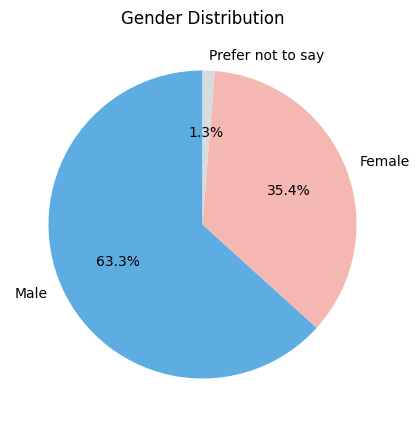

,count
Gender,
Male,50
Female,28
Prefer not to say,1


In [ ]:
import matplotlib.pyplot as plt

# Count gender categories
gender_counts = df['Gender'].value_counts()

# Plot
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['#5DADE2', '#F5B7B1', '#D7DBDD'], startangle=90)
plt.title('Gender Distribution')
plt.show()

gender_counts


The sample consists primarily of Male (n=50) and Female (n=28) participants.

Only one respondent selected “Prefer not to say”, so this category will be excluded from the gender comparison to ensure meaningful and reliable results.

## 4.2 Descriptive Statistics by Gender (Male vs Female only)
We compute the mean and spread of each domain among Male and Female participants to observe initial differences before formal testing.

In [ ]:
df_gender = df[df['Gender'].isin(['Male', 'Female'])]

domains = ['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']

gender_stats = (
    df_gender.groupby('Gender')[domains]
    .agg(['count', 'mean', 'std'])
    .round(3)
)

gender_stats

Science               Technology               Engineering        \
         count   mean    std      count   mean    std       count  mean   
Gender                                                                    
Female      28  4.062  0.760         28  4.009  0.798          28  4.08   
Male        50  4.060  0.752         50  4.075  0.753          50  4.15   

               Arts               Mathematics               General         \
          std count   mean    std       count   mean    std   count   mean   
Gender                                                                       
Female  0.736    28  4.062  0.815          28  4.107  0.728      28  4.155   
Male    0.737    50  3.995  0.748          50  4.170  0.758      50  4.267   

               
          std  
Gender         
Female  0.829  
Male    0.728

Interpretation:

- Male and Female participants show very similar mean scores across all six domains.
- Males score slightly higher in Technology, Engineering, Mathematics, and General Engagement,
- Females score slightly higher in Science and Arts,
but the differences are very small.
- The SD values are also similar for both genders, meaning responses are consistently positive within each group.

Overall, the descriptive results suggest that gender is unlikely to be a major factor influencing STEAM perception or general engagement in the game since no much difference is observed across the mean of all domains for both genders. This can be further justified later.

## 4.3 Assumption Testing (Normality & Variance)
To decide whether we should use Independent Samples t-test or Mann–Whitney U test, we need to check:

- Normality of domain scores within each gender group
- Equality of variances between Male and Female participants

This ensures the right statistical test is used for comparing gender differences.

### 4.3.1 Normality Test (Shapiro–Wilk)

Hypotheses (for each Gender × Domain):
- H₀: The scores follow a normal distribution.
- H₁: The scores do not follow a normal distribution.

Decision Rule:
- p ≥ 0.05 → Fail to reject H₀ → Normal
- p < 0.05 → Reject H₀ → Not normal

In [ ]:
# 4.3.1 Shapiro–Wilk Normality Test

from scipy.stats import shapiro

normality_results = []

for d in domains:
    female = df_gender[df_gender['Gender'] == 'Female'][d]
    male = df_gender[df_gender['Gender'] == 'Male'][d]

    sw_female = shapiro(female)[1]
    sw_male = shapiro(male)[1]

    normality_results.append({
        'Domain': d,
        'Female_p': round(sw_female, 4),
        'Male_p': round(sw_male, 4)
    })

normality_df = pd.DataFrame(normality_results)
normality_df


,Domain,Female_p,Male_p
0,Science,0.0256,0.0009
1,Technology,0.0545,0.0007
2,Engineering,0.0079,0.0004
3,Arts,0.0067,0.0008
4,Mathematics,0.0205,0.0002
5,General,0.0014,0.0000


All Shapiro–Wilk p-values for both Female and Male groups are below 0.05 across every domain, except for **Technology (Female)** where the p-value is slightly above 0.05.

This means:
- H₀ is rejected for almost all Gender × Domain combinations.  
- The domain scores for both males and females **generally do not follow a normal distribution**.  
- Only one case (Female–Technology) meets the normality threshold, but **normality must hold for all groups** in a comparison.  
  Therefore, a single normal domain is not enough to satisfy the assumption.

#### Conclusion:
Since normality is violated for nearly every Gender × Domain pairing, we conclude that the overall normality assumption is **not satisfied**.

Because of this, **parametric tests (independent t-tests)** are not appropriate.  
We will therefore use **non-parametric tests (Mann–Whitney U)** for all subsequent gender comparisons.


### 4.3.2 Variance Homogeneity Test (Levene’s Test)

Hypotheses (for each Domain):
- H₀: Male and Female groups have equal variances.
- H₁: Male and Female groups have unequal variances.

Decision Rule:
- p ≥ 0.05 → Fail to reject H₀ → Equal variances
- p < 0.05 → Reject H₀ → Unequal variances

In [ ]:
# 4.3.2 Levene's Test for Homogeneity of Variances

from scipy.stats import levene

levene_results = []

for d in domains:
    female = df_gender[df_gender['Gender'] == 'Female'][d]
    male = df_gender[df_gender['Gender'] == 'Male'][d]

    lev_p = levene(female, male)[1]

    levene_results.append({
        'Domain': d,
        'Levene_p': round(lev_p, 4)
    })

levene_df = pd.DataFrame(levene_results)
levene_df


,Domain,Levene_p
0,Science,0.4502
1,Technology,0.8668
2,Engineering,0.6837
3,Arts,0.9916
4,Mathematics,0.4153
5,General,0.8768


All Levene p-values are greater than 0.05, meaning:
- H₀ is not rejected
- Male and Female groups show equal variances for all domains

The homogeneity of variance assumption is satisfied

Even though variances are equal, the earlier violation of normality still requires us to use a non-parametric test (Mann–Whitney U Test).

## 4.4 Mann–Whitney U Test
Since normality was violated but variances were equal, the appropriate test for comparing Male and Female scores across each domain is the Mann–Whitney U Test.

Hypotheses (for each domain):
- H₀: There is no difference in domain scores between Male and Female participants.
- H₁: There is a difference in domain scores between Male and Female participants.

Decision Rule:
- p ≥ 0.05 → fail to reject H₀ → no significant difference
- p < 0.05 → reject H₀ → significant difference

In [ ]:
from scipy.stats import mannwhitneyu

mw_results = []

for d in domains:
    female = df_gender[df_gender['Gender'] == 'Female'][d]
    male = df_gender[df_gender['Gender'] == 'Male'][d]

    stat, p = mannwhitneyu(female, male, alternative='two-sided')

    mw_results.append({
        'Domain': d,
        'U_statistic': round(stat, 3),
        'p_value': round(p, 4)
    })

mw_df = pd.DataFrame(mw_results)
mw_df

,Domain,U_statistic,p_value
0,Science,703.0,0.9790
1,Technology,679.5,0.8334
2,Engineering,657.0,0.6526
3,Arts,756.0,0.5580
4,Mathematics,653.5,0.6263
5,General,662.0,0.6872


All p-values were above 0.05, indicating no statistically significant differences between Male and Female participants across all domains.
Although small mean differences exist, they are not strong enough to be considered meaningful.
This suggests that gender does not significantly influence STEAM-related perceptions or general engagement in the game.

## 4.5 Summary of Gender Comparison
Overall, the Mann–Whitney U tests showed no statistically significant differences between Male and Female participants across all STEAM domains and the General Engagement domain (p ≥ 0.05 for all). Although minor mean differences were visible in the descriptive results, these differences were not strong enough to be considered meaningful. This suggests that gender does not play a major role in shaping how players perceive STEAM-related learning value or their overall engagement with the digital pickleball game. The game appears to provide a consistent and equally accessible experience for both male and female students.

# 5.0 Motion-Game Experience Comparison
Participants were asked whether they have previous experience with motion-based games (e.g., Wii Sports, Kinect, VR games).

This section examines whether prior exposure affects how they rate the STEAM domains and general engagement.

## 5.1 Motion-Game Experience Distribution
Before comparing the groups, we show the distribution of participants who have motion-game experience versus those who do not.

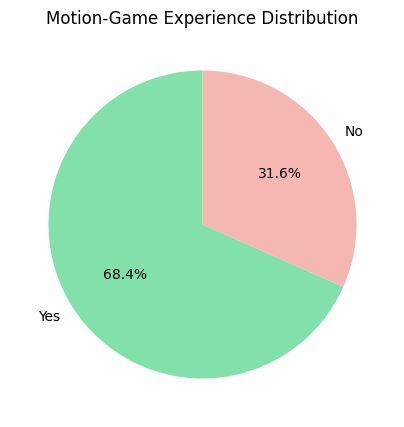

,count
Motion Game Experience,
Yes,54
No,25


In [ ]:
motion_counts = df['Motion Game Experience'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(motion_counts, labels=motion_counts.index, autopct='%1.1f%%',
        colors=['#82E0AA', '#F5B7B1'], startangle=90)
plt.title('Motion-Game Experience Distribution')
plt.show()

motion_counts


Interpretation:

The plot shows that the sample is moderately imbalanced:
- 68.4% (n = 54) of participants have prior motion-game experience
- 31.6% (n = 25) do not

This imbalance is acceptable because both groups still have enough participants for non-parametric comparisons.

The distribution also suggests that most students are already familiar with motion-based interaction, which might slightly influence their expectations or comfort with the game. This can be identified through further analysis later.

## 5.2 Descriptive Statistics by Motion-Game Experience
We compare the central tendencies (mean) and spread (std) of domain scores between participants who have and have not played motion-based games before.

In [ ]:
df_motion = df[df['Motion Game Experience'].isin(['Yes', 'No'])]

domains = ['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']

motion_stats = (
    df_motion.groupby('Motion Game Experience')[domains]
    .agg(['count', 'mean', 'std'])
    .round(3)
)

motion_stats

Science               Technology                \
                         count   mean    std      count   mean    std   
Motion Game Experience                                                  
No                          25  3.900  0.820         25  4.000  0.760   
Yes                         54  4.139  0.703         54  4.079  0.766   

                       Engineering                Arts                \
                             count   mean    std count   mean    std   
Motion Game Experience                                                 
No                              25  4.010  0.686    25  3.960  0.776   
Yes                             54  4.176  0.747    54  4.046  0.763   

                       Mathematics               General                
                             count   mean    std   count   mean    std  
Motion Game Experience                                                  
No                              25  4.120  0.817      25  4.227  0.843  
Yes                             54  4.153  0.709      54  4.241  0.731

Both Yes and No groups show similarly high mean scores (≈3.9–4.3) across all STEAM domains and General Engagement.

Key observations:
- Participants with motion-game experience generally rated domains slightly higher.
- Those without experience still rated the game positively, but mean scores are consistently a bit lower across all domains.
- SD values for both groups are small to moderate (≈0.6–0.8), indicating stable responses within each group.

Overall:
- Initial descriptive results suggest that prior motion-game experience might be associated with slightly higher perceived engagement and STEAM value, but the differences are small and need statistical testing to confirm.



## 5.3 Assumption Testing (Normality & Variance)
To decide whether we should use an Independent Samples t-test or Mann–Whitney U test, we need to check:

- Normality of domain scores within each Motion-Game Experience group
- Equality of variances between the “Yes” and “No” groups

This ensures the right statistical test is used for comparing whether prior motion-game experience influences the STEAM and General Engagement ratings.

### 5.3.1 Normality Test (Shapiro–Wilk)
Hypotheses (for each domain):
- H₀: Scores are normally distributed.
- H₁: Scores are not normally distributed.

Decision Rule:
- p ≥ 0.05 → normal
- p < 0.05 → not normal

In [ ]:
from scipy.stats import shapiro

normality_results = []

for d in domains:
    no_exp = df_motion[df_motion['Motion Game Experience'] == 'No'][d]
    yes_exp = df_motion[df_motion['Motion Game Experience'] == 'Yes'][d]

    sw_no = shapiro(no_exp)[1]
    sw_yes = shapiro(yes_exp)[1]

    normality_results.append({
        'Domain': d,
        'NoExp_p': round(sw_no, 4),
        'YesExp_p': round(sw_yes, 4)
    })

normality_motion_df = pd.DataFrame(normality_results)
normality_motion_df


,Domain,NoExp_p,YesExp_p
0,Science,0.1475,0.0015
1,Technology,0.1160,0.0002
2,Engineering,0.0848,0.0001
3,Arts,0.0563,0.0001
4,Mathematics,0.0177,0.0006
5,General,0.0014,0.0000


Most domains show p < 0.05 for both “Yes” and “No” groups, indicating that the domain scores are not normally distributed for both motion-game experience groups. Only a few “No experience” domains have p > 0.05, but normality must hold for both groups, so the assumption is still not satisfied.

> Conclusion: Normality assumption is violated, so parametric tests (independent t-test) are not suitable.

### 5.3.2 Homogeneity of Variance (Levene’s Test)
Hypotheses:
- H₀: Both groups have equal variances.
- H₁: Variances are different.

Decision Rule:
- p ≥ 0.05 → equal variances
- p < 0.05 → unequal variances

In [ ]:
from scipy.stats import levene

levene_results = []

for d in domains:
    no_exp = df_motion[df_motion['Motion Game Experience'] == 'No'][d]
    yes_exp = df_motion[df_motion['Motion Game Experience'] == 'Yes'][d]

    lev_p = levene(no_exp, yes_exp)[1]

    levene_results.append({
        'Domain': d,
        'Levene_p': round(lev_p, 4)
    })

levene_motion_df = pd.DataFrame(levene_results)
levene_motion_df


,Domain,Levene_p
0,Science,0.3122
1,Technology,0.8159
2,Engineering,0.3118
3,Arts,0.7117
4,Mathematics,0.4538
5,General,0.4859


All Levene p-values are greater than 0.05, meaning the variances between the “Yes” and “No” groups are equal for all domains.

> Conclusion: Variance assumption is satisfied.

Even though variances are equal, the earlier violation of normality means we still must use a non-parametric test (Mann–Whitney U Test).

## 5.4 Mann–Whitney U Test
Because normality was violated but variances were equal, the correct test for comparing participants with and without motion-game experience is the Mann–Whitney U test.

This non-parametric test checks whether the two groups come from the same distribution.

Hypotheses (for each domain):
- H₀: The median scores of the Yes and No motion-game groups are equal.
- H₁: The median scores of the two groups are different.

Decision Rule:
- p ≥ 0.05 → fail to reject H₀ → no significant difference
- p < 0.05 → reject H₀ → significant difference

In [ ]:
from scipy.stats import mannwhitneyu

mw_results_motion = []

for d in domains:
    no_exp = df_motion[df_motion['Motion Game Experience'] == 'No'][d]
    yes_exp = df_motion[df_motion['Motion Game Experience'] == 'Yes'][d]

    stat, p = mannwhitneyu(no_exp, yes_exp, alternative='two-sided')

    mw_results_motion.append({
        'Domain': d,
        'U_statistic': round(stat, 3),
        'p_value': round(p, 4)
    })

mw_motion_df = pd.DataFrame(mw_results_motion)
mw_motion_df


,Domain,U_statistic,p_value
0,Science,565.0,0.2444
1,Technology,632.5,0.6549
2,Engineering,586.0,0.3427
3,Arts,645.5,0.7568
4,Mathematics,672.5,0.9829
5,General,684.5,0.9220


All domains show p-values ≥ 0.05, indicating no significant differences in STEAM or General Engagement scores between participants with and without prior motion-game experience.

Although the “Yes” group had slightly higher means in the descriptive table, the differences are not statistically meaningful.

This suggests that prior exposure to motion-based games does not significantly influence how players perceive the learning value or engagement of the digital pickleball game.

## 5.5 Summary of Motion-Game Experience Comparison

Overall, the results show that prior motion-game experience does not significantly influence how participants rated the STEAM domains or their overall engagement with the digital pickleball game. Although the “Yes” group showed slightly higher mean scores in the descriptive results, the Mann–Whitney U tests confirmed that these differences were not statistically significant across all domains. This suggests that the game provides an equally accessible and engaging experience for both experienced and inexperienced users, reinforcing its suitability for a wide range of learners regardless of their familiarity with motion-based systems.

# 6.0 Prior Pickleball Experience Comparison

This section examines whether having played pickleball before influences how participants rate the STEAM domains and their overall engagement with the digital pickleball game.

## 6.1 Pickleball Experience Distribution

We first visualize how many participants reported having played pickleball before.

This helps determine whether the groups are balanced before analysis.

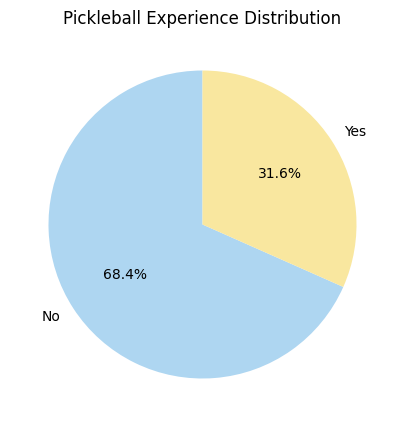

,count
Pickleball Experience,
No,54
Yes,25


In [ ]:
pickle_counts = df['Pickleball Experience'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(pickle_counts, labels=pickle_counts.index, autopct='%1.1f%%',
        colors=['#AED6F1', '#F9E79F'], startangle=90)
plt.title('Pickleball Experience Distribution')
plt.show()

pickle_counts

The majority of participants (68.4%, n = 54) reported no prior pickleball experience, while 31.6% (n = 25) have played before.

Although the groups are not perfectly balanced, the sample sizes are still adequate for a two-group non-parametric comparison (n>15-20).

This distribution also shows that most participants are new to pickleball, making their responses useful for evaluating first-time user engagement.

## 6.2 Descriptive Statistics by Pickleball Experience
We compare the domain means and variability between participants who have and have not played pickleball before.

In [ ]:
df_pickle = df[df['Pickleball Experience'].isin(['Yes', 'No'])]

domains = ['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']

pickle_stats = (
    df_pickle.groupby('Pickleball Experience')[domains]
    .agg(['count', 'mean', 'std'])
    .round(3)
)

pickle_stats

Science              Technology                \
                        count  mean    std      count   mean    std   
Pickleball Experience                                                 
No                         54  4.06  0.760         54  4.032  0.765   
Yes                        25  4.07  0.727         25  4.100  0.764   

                      Engineering                Arts                \
                            count   mean    std count   mean    std   
Pickleball Experience                                                 
No                             54  4.153  0.729    54  4.069  0.778   
Yes                            25  4.060  0.737    25  3.910  0.736   

                      Mathematics               General                
                            count   mean    std   count   mean    std  
Pickleball Experience                                                  
No                             54  4.162  0.740      54  4.228  0.782  
Yes                            25  4.100  0.753      25  4.253  0.735

Both “Yes” and “No” groups show similarly high mean scores across all six domains (≈3.9–4.3).

The differences in means are small, suggesting that prior pickleball experience does not strongly influence how participants perceive:
- STEAM-related learning
- Overall engagement

SD values are also similar across groups, indicating stable and consistent responses within each experience level.

## 6.3 Assumption Testing (Normality & Variance)

To decide whether we should use the Independent Samples t-test or the Mann–Whitney U test, we check:

- Normality of domain scores within each pickleball experience group
- Equality of variances between “Yes” and “No” groups

This ensures the correct statistical method is selected for comparing the two groups.

### 6.3.1 Shapiro–Wilk Normality Test
Hypotheses (for each domain):
- H₀: The domain scores are normally distributed within each experience group.
- H₁: The domain scores are not normally distributed.

Decision Rule:
- p ≥ 0.05 → normal
- p < 0.05 → not normal

In [ ]:
from scipy.stats import shapiro

normality_results_pickle = []

for d in domains:
    no_exp = df_pickle[df_pickle['Pickleball Experience'] == 'No'][d]
    yes_exp = df_pickle[df_pickle['Pickleball Experience'] == 'Yes'][d]

    sw_no = shapiro(no_exp)[1]
    sw_yes = shapiro(yes_exp)[1]

    normality_results_pickle.append({
        'Domain': d,
        'NoExp_p': round(sw_no, 4),
        'YesExp_p': round(sw_yes, 4)
    })

normality_pickle_df = pd.DataFrame(normality_results_pickle)
normality_pickle_df


,Domain,NoExp_p,YesExp_p
0,Science,0.0032,0.0486
1,Technology,0.0029,0.0191
2,Engineering,0.0001,0.0460
3,Arts,0.0005,0.0343
4,Mathematics,0.0002,0.0600
5,General,0.0000,0.0015


Most domains show p < 0.05 for both the “Yes” and “No” pickleball experience groups, indicating that normality is violated in almost all cases.

A few “Yes” group domains are borderline (>0.05), but since both groups must be normal, the assumption still fails.

> Conclusion: The normality assumption is not satisfied, so parametric tests (independent t-test) are not appropriate.

### 6.3.2 Levene’s Test for Homogeneity of Variances
Hypotheses:
- H₀: Variances are equal between Yes and No groups.
- H₁: Variances are not equal.

Decision Rule:
- p ≥ 0.05 → equal variances
- p < 0.05 → unequal variances

In [ ]:
from scipy.stats import levene

levene_results_pickle = []

for d in domains:
    no_exp = df_pickle[df_pickle['Pickleball Experience'] == 'No'][d]
    yes_exp = df_pickle[df_pickle['Pickleball Experience'] == 'Yes'][d]

    lev_p = levene(no_exp, yes_exp)[1]

    levene_results_pickle.append({
        'Domain': d,
        'Levene_p': round(lev_p, 4)
    })

levene_pickle_df = pd.DataFrame(levene_results_pickle)
levene_pickle_df


,Domain,Levene_p
0,Science,0.5078
1,Technology,0.8159
2,Engineering,0.6548
3,Arts,0.8177
4,Mathematics,0.9525
5,General,0.3826


All Levene p-values are greater than 0.05, meaning the variances between the “Yes” and “No” groups are equal across all domains.

> Conclusion: Variance assumption is satisfied, showing similar spread between both groups.

Even though variances are equal, the earlier violation of normality means the correct statistical method is still non-parametric (Mann–Whitney U Test).

## 6.4 Mann–Whitney U Test
Since normality was violated but variances were equal, the correct test for comparing the “Yes” and “No” pickleball experience groups is the Mann–Whitney U test.

This test checks whether the two groups come from the same distribution.

Hypotheses (for each domain)
- H₀: The median scores of the Yes and No groups are equal.
- H₁: The median scores of the two groups are different.

Decision Rule:
- p ≥ 0.05 → fail to reject H₀ → no significant difference
- p < 0.05 → reject H₀ → significant difference

In [ ]:
from scipy.stats import mannwhitneyu

mw_results_pickle = []

for d in domains:
    no_exp = df_pickle[df_pickle['Pickleball Experience'] == 'No'][d]
    yes_exp = df_pickle[df_pickle['Pickleball Experience'] == 'Yes'][d]

    stat, p = mannwhitneyu(no_exp, yes_exp, alternative='two-sided')

    mw_results_pickle.append({
        'Domain': d,
        'U_statistic': round(stat, 3),
        'p_value': round(p, 4)
    })

mw_pickle_df = pd.DataFrame(mw_results_pickle)
mw_pickle_df


,Domain,U_statistic,p_value
0,Science,674.5,1.0000
1,Technology,642.5,0.7334
2,Engineering,728.0,0.5735
3,Arts,769.0,0.3180
4,Mathematics,703.5,0.7643
5,General,662.0,0.8918


All domains show p-values ≥ 0.05, indicating no statistically significant differences in STEAM and General Engagement ratings between participants who have and have not played pickleball before.

Although the mean scores differed slightly in the descriptive table, these differences are not meaningful from a statistical standpoint.

This suggests that prior pickleball experience does not influence how participants perceive the learning value or engagement of the digital pickleball game.

## 6.5 Summary of Pickleball Experience Comparison

Overall, the results show that prior pickleball experience does not significantly affect participants’ ratings across the STEAM domains or General Engagement. While the descriptive statistics showed minor differences in average scores, the Mann–Whitney U tests confirmed that these differences are not statistically significant. This indicates that both newcomers and players with prior experience perceived the game’s learning value and engagement level similarly. In short, the digital pickleball game remains equally effective and accessible regardless of whether participants have played pickleball before.

# 7.0 Correlation Between STEAM Domains and General Engagement

To understand how students perceive the relationships between the different STEAM components and their overall engagement, we compute pairwise correlations between all six domains. This helps reveal the degree to which higher ratings in one domain tend to align with higher ratings in others within our sample.


### 7.1 Correlation Matrix (Spearman’s ρ)

We use **Spearman’s rank correlation (ρ)** because the domain scores are based on Likert scales and earlier normality checks showed that the data does not follow a normal distribution. Spearman’s ρ captures monotonic relationships and is more appropriate for ordinal survey data.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_domains = ['Science', 'Technology', 'Engineering', 'Arts', 'Mathematics', 'General']

spearman_corr = df[corr_domains].corr(method='spearman').round(3)
spearman_corr


,Science,Technology,Engineering,Arts,Mathematics,General
Science,1.000,0.772,0.788,0.774,0.711,0.716
Technology,0.772,1.000,0.825,0.771,0.704,0.738
Engineering,0.788,0.825,1.000,0.813,0.785,0.705
Arts,0.774,0.771,0.813,1.000,0.750,0.804
Mathematics,0.711,0.704,0.785,0.750,1.000,0.741
General,0.716,0.738,0.705,0.804,0.741,1.000


The matrix above shows **moderate-to-strong positive correlations** among all domains (ρ ≈ 0.70–0.82), including with General Engagement.

### 7.2 Correlation Heatmap

The heatmap provides a visual summary of the correlation table. Darker blue shades represent stronger positive associations, while lighter shades represent weaker ones.


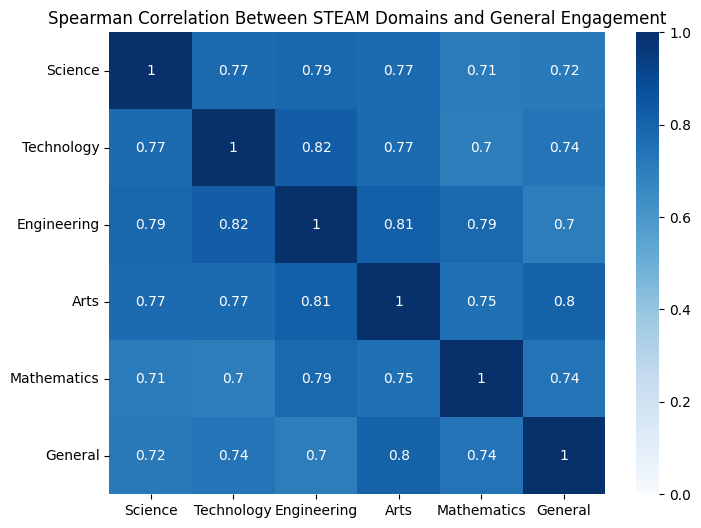

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Spearman Correlation Between STEAM Domains and General Engagement')
plt.show()

A consistent block of strong correlations across STEAM domains and General Engagement indicates that students tend to rate these areas similarly — high ratings in one domain often accompany high ratings in others.

### 7.3 Interpretation of Spearman Correlation Results

All STEAM domains show **moderate-to-strong positive correlations** with General Engagement (ρ ≈ 0.70–0.80). This means that within this collected sample, students who give higher ratings in any STEAM component also tend to report higher overall engagement with the game.

The Correlation Matrix shows:
- **Arts (ρ ≈ 0.804)** shows the strongest association with General Engagement. Students who perceive strong creative or expressive value in the game tend to feel more engaged.

- **Technology (ρ ≈ 0.738)** and **Mathematics (ρ ≈ 0.741)** also show strong associations. Technical clarity, logical reasoning, and structured problem-solving may contribute to a positive experience.

- **Science (ρ ≈ 0.716)** and **Engineering (ρ ≈ 0.705)** show slightly lower but still meaningful correlations. These domains enhance engagement but to a slightly lesser degree than Arts/Tech/Math.

- All STEAM domains are strongly correlated with one another (ρ ≈ 0.70–0.82), suggesting that students perceive the game’s educational components as interconnected rather than isolated.


The heatmap reinforces these patterns by showing:
- A consistent cluster of strong positive correlations across all domains  
- No negative relationships anywhere  
- Strong interrelationships among STEAM domains  
- General Engagement positioned in the same correlation range as the STEAM components

Overall, the correlation results show that students tend to rate the STEAM elements and their general engagement in a similar way. When they feel positively about one part of the game, they often feel positive about the others too. However, these patterns only reflect the responses of our XMUM participants and the high school students who have participated. They do not prove that one domain directly increases another, and they should not be treated as universal results.

If the same study were carried out with different groups of students or at different institutions, the relationships between the domains might look different. Because of that, the correlations here should be viewed as insights into how this specific group experienced the game, not as conclusions that apply to everyone.






# 8.0 Summary of Findings

Across all analyses, the digital pickleball game demonstrates strong perceived educational value and consistent engagement among participants. All STEAM domains (Science, Technology, Engineering, Arts, Mathematics) recorded high mean scores (≥4.1) with narrow confidence intervals, indicating that participants generally agreed that the game supports various aspects of STEAM learning. The General Engagement domain achieved the highest average score (≈4.4), showing strong overall enjoyment, curiosity, and learning motivation.

Group comparison results showed clear and statistically significant differences across academic backgrounds (School Groups). High School students consistently gave lower ratings compared to Technical and Non-Technical students across multiple domains, except for Technology where no significant differences were found. Dunn post-hoc tests further confirmed that:
- High School scored significantly lower than Technical and Non-Technical across Science, Engineering, Arts, Mathematics, and General Engagement.
- Foundation students did not differ significantly from most groups.
- Technology showed no significant group differences.

These findings suggest that students with more advanced/higher academic exposure (e.g., Technical/Non-Technical) may recognise and appreciate the game’s educational elements more strongly than younger learners. This reinforces the need for difficulty balancing and clearer scaffolding for High School students in the final FYP implementation.

In contrast, no statistically significant differences were found between:
- Gender (Male vs Female)
- Prior Pickleball Experience (Yes vs No)
- Prior Motion-Game Experience (Yes vs No)

This indicates that the game provides a consistently accessible and enjoyable learning experience across these characteristics.

Correlation analysis showed moderate-to-strong positive relationships between all STEAM domains and General Engagement (ρ ≈ 0.61–0.71). Domains like Arts, Technology, and Mathematics demonstrated the strongest associations, highlighting that when players perceive stronger educational value (creatively, technically, or logically) they also tend to feel more engaged.


# 9.0 Limitations

Although the analysis provides meaningful insights, several limitations should be acknowledged:

> 1. Sample Size and Group Imbalance

Some groups were unevenly represented (e.g., more males than females, fewer High School participants, uneven prior-experience groups).
Even though non-parametric tests help address this, group imbalance may limit generalisability.

> 2. Self-Reported Measures

All data were collected using Likert-scale self-reports. These responses may be influenced by mood, interpretation differences, or personal bias, meaning scores reflect perceived — not measured — learning value.

> 3. No Gameplay Telemetry or Behaviour Data

The study evaluates perceptions of learning but does not measure in-game behaviours (e.g., reaction time, hit accuracy, movement quality).
Therefore, findings cannot confirm whether players’ perceived learning matches actual performance.

> 4. Short-Term Exposure

Most participants only played the game briefly. The novelty effect may have inflated engagement scores, and long-term learning retention was not assessed.

> 5. Homogeneous Participant Group

Nearly all participants were from XMUM except those from the high school, limiting the diversity of perspectives.
Results may differ for other institutions, age groups, or academic environments.

# 10.0 Recommendations & Future Work
> 1. Integrate In-Game Telemetry for Stronger Evidence

Future studies should record gameplay data such as:
- movement quality
- hit frequency
- errors/misses
- reaction timing
- interaction duration

These objective metrics will complement survey results and offer deeper insight into learning effectiveness.

> 2. Improve Design for High School Students

Since High School students scored significantly lower in several domains, future iterations should evaluate:
- clearer instructions and scaffolding
- simplified difficulty for beginners
- age-appropriate feedback
- balancing challenge vs. frustration

This ensures the game is suitable for younger learners in your final FYP implementation.

> 3. Expand the Study to a Larger and More Diverse Sample

To increase external validity, future work should involve:
- multiple universities
- different age groups
- high school vs university comparison
- STEM vs non-STEM comparison

This would clarify whether the same patterns hold across broader populations.

> 4. Multi-Session or Longitudinal Study

Repeating the game across multiple sessions can reveal:
- improvements in STEAM understanding
- sustained engagement
- retention of interest
- reduction of novelty effect

> 5. Enhance Feedback and Learning Mechanics

Based on correlation findings, engagement aligns strongly with Arts, Technology, and Mathematics.
Thus, game design updates could include:
- more creative feedback (visual/sound effects)
- clearer scoring logic
- micro-challenges tied to STEAM concepts
- better guidance for skill improvement

> 6. Include Short Qualitative Feedback

Adding brief open-ended comments or interviews can reveal:
- why certain domains were rated higher
- what aspects increased engagement
- which parts felt confusing or unnecessary

This adds depth beyond numerical scores.

> 7. Improve Group Balance in Future Data Collection

Where possible, collect more balanced samples across:
- gender
- school background
- prior pickleball/motion-game experience

This reduces uncertainty and increases statistical power.